        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Introduction to Pandas</h1>

<p>Pandas is a package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with <b>heterogeneous</b> data types and/or missing data.

In [1]:
import pandas as pd

<p>Pandas has two main types of data structure:</p>
<ul>
    <li>Series</li>
    <li>DataFrames</li>
<ul>
        

## 1. Series

In [271]:
exp1_series = pd.Series([0.25, 0.5, 0.75, 1.0])
exp1_series

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [128]:
exp1_series.values

array([0.25, 0.5 , 0.75, 1.  ])

In [129]:
exp1_series.index

RangeIndex(start=0, stop=4, step=1)

In [130]:
# You can define index separately
exp2_series = pd.Series(data=[1,'a', 2, 'b', 3], index=['c1','c2','c3','c4','c5'])
print("Values")
print(exp2_series.values)
print("Index")
print(exp2_series.index)

Values
[1 'a' 2 'b' 3]
Index
Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')


<p><b>Note:</b> You can also use dictionaries to define series.</p>

In [131]:
a_dict = {'a1':1,'a2':2, 'a3':3, 'a4':4, 'a5':5}
exp3_series = pd.Series(a_dict)
exp3_series

a1    1
a2    2
a3    3
a4    4
a5    5
dtype: int64

<p><b>Note:</b> To access values in series you can use both sequential indices and defined index values.</p>

In [132]:
# Example
print(exp3_series[1])
print(exp3_series['a1'])

2
1


In [133]:
# To access more than one value 
print(exp3_series[[0,2]])
print('---------')
# Or
print(exp3_series.iloc[[0,2]])         #iloc implicit referencing
print()
# Or
print(exp3_series[['a1','a3']])
print()
# Or
print(exp3_series.loc[['a1','a3']])    #loc explicit referencing 

a1    1
a3    3
dtype: int64
---------
a1    1
a3    3
dtype: int64

a1    1
a3    3
dtype: int64

a1    1
a3    3
dtype: int64


<p><b>Note:</b> It is always better to use <i>loc</i> and <i>iloc</i> to access to the values. That can help you to avoid possible errors.</p>

In [134]:
exp4_series = pd.Series(data=[1,'a', 2, 'b', 3], index=[4,5,6,7,8])
#exp4_series[0]   # You will get an error message
exp4_series

4    1
5    a
6    2
7    b
8    3
dtype: object

In [135]:
exp4_series.iloc[1]  #implicit
#exp4_series.loc[7]

'a'

<p><b>Note:</b> Similar to arrays in Numpy, you can apply operations to the series.</p>

In [136]:
exp5_series = pd.Series([1,'abc',2,'def',3])
exp5_series * 3

0            3
1    abcabcabc
2            6
3    defdefdef
4            9
dtype: object

## 2. DataFrame

<p>The DataFrame is a generalization of arrays in NumPy. DataFrame is an analog of a two-dimensional array with both flexible <b>row indices</b> and flexible <b>column names</b>.</p>

<p>There are three common methods to form DataFrames:</p>
<ol>
    <li>Dictionary of Pandas Series</li>
    <li>List of Dictionaries</li>
    <li>Two-dimensional NumPy array</li>  
</ol>

In [275]:
# Method 1: Dictionary of Pandas Series
population_dict = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
pupulation = pd.Series(population_dict)



area_dict = {'California': 423967,
             'Texas': 695662,
             'New York': 141297,
             'Florida': 170312,
             'Illinois': 149995,
             'Charleston':232323}
area = pd.Series(area_dict)

state_data = pd.DataFrame({'Population':pupulation, 'Area':area})
state_data


,Population,Area
California,38332521.0,423967
Charleston,NaN,232323
Florida,19552860.0,170312
Illinois,12882135.0,149995
New York,19651127.0,141297
Texas,26448193.0,695662


In [273]:
state_data.iloc[:,[0,1]]

,Population,Area
California,38332521.0,423967
Charleston,NaN,232323
Florida,19552860.0,170312
Illinois,12882135.0,149995
New York,19651127.0,141297
Texas,26448193.0,695662


In [139]:
height_dict = {'Ali': 180, 'John': 185, 'Mona':160, 'Razi':162}
age_dict = {'Ali': 34, 'John': 56, 'Mona':85, 'Razi':80}
people_data = pd.DataFrame({'height':height_dict, 'age':age_dict})
people_data 

,height,age
Ali,180,34
John,185,56
Mona,160,85
Razi,162,80


In [140]:
people_height = people_data["height"] > 180
people_data[people_height]

,height,age
John,185,56


In [276]:
# You can combine the last two steps and do it in one step.
state_data = pd.DataFrame({'Population': pd.Series({'California': 38332521,'Texas': 26448193,'New York': 19651127,
                                                    'Florida': 19552860,'Illinois': 12882135}), 
                           'Area':pd.Series({'California': 423967,'Texas': 695662,'New York': 141297,
                                             'Florida': 170312, 'Illinois': 149995})
                          })
state_data

,Population,Area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


<p><b>Note:</b> If you do not want to define row names, then you can use a dictionary of lists to create the data farme.</p>

In [142]:
state_data_without_rownames = pd.DataFrame({'Population': [38332521, 26448193, 19651127, 19552860, 12882135], 
                                            'Area':[423967, 695662, 141297, 170312, 149995]})
state_data_without_rownames

,Population,Area
0,38332521,423967
1,26448193,695662
2,19651127,141297
3,19552860,170312
4,12882135,149995


<p><b>Example:</b> Create a new DataFrame with row names that includes "Population", "Area", and "Capital" information for California, Texas, New York, Florida, and Illinois. </p>

In [143]:
state_data = pd.DataFrame({'Population': pd.Series({'California': 38332521,'Texas': 26448193,'New York': 19651127,
                                                    'Florida': 19552860,'Illinois': 12882135}),
                           'Area':pd.Series({'California': 423967,'Texas': 695662,'New York': 141297,
                                             'Florida': 170312, 'Illinois': 149995}),
                            'Capital':pd.Series({'California': 'LA' ,'Texas': 'Austin' ,'New York': 'Manhatan',
                                                'Florida': 'Orlando' ,'Illinois': 'Chicago'})
                           
                           })
state_data  

,Population,Area,Capital
California,38332521,423967,LA
Texas,26448193,695662,Austin
New York,19651127,141297,Manhatan
Florida,19552860,170312,Orlando
Illinois,12882135,149995,Chicago


<p><b>Note:</b> To form a DataFrame, you can use Series with different indicies and even in different orders. Pandas matches indicies from different Series. If it cannot find an index inside one provided Series then it fills the associated value for that column and index inside the DataFrame with <b style="color:blue;">NaN</b>. </p>

In [144]:
state_data = pd.DataFrame({'Population': pd.Series({'Texas': 26448193,'Illinois': 12882135,'Wisconsin':5840615,
                                                    'Florida': 19552860,'California': 38332521, 'New York': 19651127 }), 
                           'Area':pd.Series({'California': 423967,'Texas': 695662,'New York': 141297,
                                             'Florida': 170312, 'Illinois': 149995, 'Arizona': 113998})
                          })
state_data

,Population,Area
Arizona,NaN,113998.0
California,38332521.0,423967.0
Florida,19552860.0,170312.0
Illinois,12882135.0,149995.0
New York,19651127.0,141297.0
Texas,26448193.0,695662.0
Wisconsin,5840615.0,NaN


In [145]:
# Method2: Use list of dictionaries
# In ths method each dictionary forms a row and keys in all dictionaries define the columns
a_list = [{'a':10,'b':15},{'b':18,'c':11,'d':5}]
a_DataFrame = pd.DataFrame(a_list)
a_DataFrame

,a,b,c,d
0,10.0,15,NaN,NaN
1,NaN,18,11.0,5.0


In [146]:
# Method3: Two-dimensional Numpy array
import numpy as np
np.random.seed(0)
an_array = np.random.randn(4,4)
a_DataFrame = pd.DataFrame(an_array, index = ['row1','row2','row3', 'row4'], columns = ['col1','col2','col3','col4'])
a_DataFrame

,col1,col2,col3,col4
row1,1.764052,0.400157,0.978738,2.240893
row2,1.867558,-0.977278,0.950088,-0.151357
row3,-0.103219,0.410599,0.144044,1.454274
row4,0.761038,0.121675,0.443863,0.333674


<p><b>Note:</b> You can use <b style="color:blue;">index</b> and <b style="color:blue;">columns</b> properties to access to row indices and column names. Keep in mind that these properites return <b>immutable</b> objects.</p>

In [147]:
state_data.index

Index(['Arizona', 'California', 'Florida', 'Illinois', 'New York', 'Texas',
       'Wisconsin'],
      dtype='object')

In [148]:
state_data.columns

Index(['Population', 'Area'], dtype='object')

<p><b>Note:</b> You can use <b style="color:blue;">shape</b> property to view the shape of a DataFrame.</p>

In [149]:
state_data.shape

(7, 2)

<p><b>Note:</b> The individual Series that make up the columns can be accessed in following styles:</p>

In [150]:
# dictionary-style indexing
state_data['Area']  # the output is an individual Series

Arizona       113998.0
California    423967.0
Florida       170312.0
Illinois      149995.0
New York      141297.0
Texas         695662.0
Wisconsin          NaN
Name: Area, dtype: float64

In [151]:
# property style
state_data.Area  # the output is an individual Series

Arizona       113998.0
California    423967.0
Florida       170312.0
Illinois      149995.0
New York      141297.0
Texas         695662.0
Wisconsin          NaN
Name: Area, dtype: float64

<p><b>Note:</b> You can create a new column using existing columns in a DataFrame.</p>

In [152]:
state_data['Density'] = state_data['Population']/state_data['Area']
state_data

,Population,Area,Density
Arizona,NaN,113998.0,NaN
California,38332521.0,423967.0,90.413926
Florida,19552860.0,170312.0,114.806121
Illinois,12882135.0,149995.0,85.883763
New York,19651127.0,141297.0,139.076746
Texas,26448193.0,695662.0,38.018740
Wisconsin,5840615.0,NaN,NaN


<p><b>Note:</b> You can use <b style="color:blue;">rename( )</b> function to rename column names and indices.</p>

In [153]:
state_data = state_data.rename(columns={'Population':'pop', 'Area':'area', 'Density':'den'}, 
                  index={'Arizona':'AZ','California':'CA','Florida':'FL','Illinois':'IL',
                         'New York':'NY','Texas':'TX','Wisconsin':'WI'}
                 )
state_data

,pop,area,den
AZ,NaN,113998.0,NaN
CA,38332521.0,423967.0,90.413926
FL,19552860.0,170312.0,114.806121
IL,12882135.0,149995.0,85.883763
NY,19651127.0,141297.0,139.076746
TX,26448193.0,695662.0,38.018740
WI,5840615.0,NaN,NaN


### 2.1. Indexing in DataFrames

<p><b>Note:</b> You can access to subset of a DataFrame in the following formats:</p>

In [154]:
pd.DataFrame(data=state_data, index = ['CA','TX','WI'])

,pop,area,den
CA,38332521.0,423967.0,90.413926
TX,26448193.0,695662.0,38.018740
WI,5840615.0,NaN,NaN


In [155]:
pd.DataFrame(state_data, index = ['CA','TX','WI'], columns=['area','den'])

,area,den
CA,423967.0,90.413926
TX,695662.0,38.018740
WI,NaN,NaN


In [156]:
state_data.iloc[:3, :2]

,pop,area
AZ,NaN,113998.0
CA,38332521.0,423967.0
FL,19552860.0,170312.0


In [157]:
state_data.loc[:'Il', :'area']

,pop,area
AZ,NaN,113998.0
CA,38332521.0,423967.0
FL,19552860.0,170312.0
IL,12882135.0,149995.0


<p><b>Note:</b> You can also apply filtering to access a subset of data. Keep in mind that to apply filtering you need to use <u>loc</u> attribute.</p>

In [158]:
state_data.loc[state_data.den>100,['pop', 'area']]

,pop,area
FL,19552860.0,170312.0
NY,19651127.0,141297.0


### 2.2. Index Alignment in DataFrames

<p><b>Note:</b> Pandas aligns DataFrames based on their column names and row indices.</p>

In [159]:
np.random.seed(0)
first_array = np.random.randint(1,10,(3,3))
second_array = np.array([[1,2],
                        [3,4]])

df1 = pd.DataFrame(first_array, columns = ['A','B','C'] )
df2 = pd.DataFrame(second_array, columns = ['B','A'] )

print(df1)
print()
print(df2)

df1 + df2

   A  B  C
0  6  1  4
1  4  8  4
2  6  3  5

   B  A
0  1  2
1  3  4


,A,B,C
0,8.0,2.0,NaN
1,8.0,11.0,NaN
2,NaN,NaN,NaN


### 2.3.Operations Between DataFrame and Series (Broadcasting)

In [160]:
a_Series = pd.Series([1,2,3,4],['a','b','c','d'])
a_dataframe = pd.DataFrame([[1,2,3,4],[5,6,7,8],[9,10,11,12]], columns = ['a','b','c','d'])
a_dataframe - a_Series

,a,b,c,d
0,0,0,0,0
1,4,4,4,4
2,8,8,8,8


<p><b>Example:</b> (1) Create a DataFrame with the shape of (5,8) and filled by random integers. (2) Subtract the first row of the DataFrame from all the rows in the DataFrame.</p>   

In [161]:

a_dataframe = pd.DataFrame(np.random.randint(0,10,(5,8)))
print(a_dataframe)
a_series = a_dataframe.iloc[0,:] 
print(a_series)
a_dataframe - a_series

   0  1  2  3  4  5  6  7
0  7  6  8  8  1  6  7  7
1  8  1  5  9  8  9  4  3
2  0  3  5  0  2  3  8  1
3  3  3  3  7  0  1  9  9
4  0  4  7  3  2  7  2  0
0    7
1    6
2    8
3    8
4    1
5    6
6    7
7    7
Name: 0, dtype: int64


,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0,0
1,1,-5,-3,1,7,3,-3,-4
2,-7,-3,-3,-8,1,-3,1,-6
3,-4,-3,-5,-1,-1,-5,2,2
4,-7,-2,-1,-5,1,1,-5,-7


<p><b>Example:</b> (1) Create a DataFrame with the shape of (6,4) and filled by random integers. (2) Subtract the second column of the DataFrame from all the columns in DataFrame.</p>

In [162]:
a_dataframe = pd.DataFrame(np.random.randint(0,10,(6,4)))
print(a_dataframe)
a_series = a_dataframe.iloc[:,1] 
print(a_series)
result = a_dataframe.T - a_series
result.T

   0  1  2  3
0  0  4  5  5
1  6  8  4  1
2  4  9  8  1
3  1  7  9  9
4  3  6  7  2
5  0  3  5  9
0    4
1    8
2    9
3    7
4    6
5    3
Name: 1, dtype: int64


,0,1,2,3
0,-4,0,1,1
1,-2,0,-4,-7
2,-5,0,-1,-8
3,-6,0,2,2
4,-3,0,1,-4
5,-3,0,2,6


### 2.4. Combining Datasets

<p><b>Note:</b> <b style="color:blue;">concat( )</b> method can be used in Pandas to concatenate datasets.</p>

In [163]:
# Example
df1 = pd.DataFrame([['A00', 'A01'],['A10','A11']], columns = ['A0','A1'], index = [0,1]) 
df1

,A0,A1
0,A00,A01
1,A10,A11


In [164]:
df2 = pd.DataFrame([['A20', 'A21'],['A30','A31']], columns = ['A0','A1'], index = [0,1]) 
df2

,A0,A1
0,A20,A21
1,A30,A31


In [165]:
pd.concat([df1,df2],axis =0)

,A0,A1
0,A00,A01
1,A10,A11
0,A20,A21
1,A30,A31


In [166]:
# having rows with similar index is not appropriate
# you can ignore existing indicies and generate new ones
pd.concat([df1,df2],axis =0, ignore_index=True)    # you can also use multi-index format which is not topic of this session

,A0,A1
0,A00,A01
1,A10,A11
2,A20,A21
3,A30,A31


In [167]:
# You can also concatenate datafarmes side by side
pd.concat([df1,df2],axis =1, ignore_index=True)

,0,1,2,3
0,A00,A01,A20,A21
1,A10,A11,A30,A31


### 2.4.1. Concatenation with join

<p>In practice data from difference sources can have different column names and you might be interested to do concatenation over the common columns. Pandas provide this option by allowing us to use inner join.</p>

In [168]:
# An example with outer joining - the default option
df3 = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns = ['A','B','C'])
df4 = pd.DataFrame([[11,12,13],[14,15,16],[17,18,19]], columns = ['B','C','D'])
pd.concat([df3,df4],axis =0, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,A,B,C,D
0,1.0,2,3,NaN
1,4.0,5,6,NaN
2,7.0,8,9,NaN
3,NaN,11,12,13.0
4,NaN,14,15,16.0
5,NaN,17,18,19.0


In [169]:
# An example with inner join
df3 = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], columns = ['A','B','C'])
df4 = pd.DataFrame([[11,12,13],[14,15,16],[17,18,19]], columns = ['B','C','D'])
pd.concat([df3,df4],axis =0, ignore_index=True, join='inner')

,B,C
0,2,3
1,5,6
2,8,9
3,11,12
4,14,15
5,17,18


### 2.4.2. Merge and Join

<p>In many cases you need to join DataFrames based on values in columns. <b style="color:blue">merge( )</b> is a method that allows us to achieve this goal. </p>

In [170]:
# Here is a new set of data
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

print(df1)

print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


<b>Note:</b> Pandas recognizes that both DataFrames have the "employee" column, so it uses that column as the key.

In [171]:
df3 = pd.merge(df1,df2)  
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


<p><b>Note:</b> You can also define the key explicitly. </p>

In [172]:
# here is an example of merge with explicit keys
df3 = pd.merge(df1,df2, on='employee')
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


<p><b>Note:</b> (Important) keep in mind that merging datasets can happen in three forms: (similar to sql) </p>

* one-to-one
* one-to-many
* many-to-many


<b>Example:</b>

In [173]:
# Let's see an example of one-to-many
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR','Data Science'],
                    'supervisor': ['Carly', 'Guido', 'Steve', 'John']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve
3,Data Science,John


In [174]:
# one-to-many merge 
df5 = pd.merge(df3, df4)
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


<b>Note:</b> Pandas merge datasets in an <b style='color:blue'>inner</b> format. That means the output only involves those key values that exist in both dataframes. If you want to have all the rows, regardless of existance of the key in both dataframes then you need to use the  <b style='color:blue'>outer</b> format. 

In [175]:
df5 = pd.merge(df3, df4)
pd.merge(df3, df4, how='outer')

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008.0,Carly
1,Jake,Engineering,2012.0,Guido
2,Lisa,Engineering,2004.0,Guido
3,Sue,HR,2014.0,Steve
4,NaN,Data Science,NaN,John


<b>Example:</b> Let's see an example of many-to-many 

In [176]:
df6 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux','spreadsheets', 'organization']})
df6

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [177]:
df7 = pd.merge(df5, df6) # this time merges on group
df7

,employee,group,hire_date,supervisor,skills
0,Bob,Accounting,2008,Carly,math
1,Bob,Accounting,2008,Carly,spreadsheets
2,Jake,Engineering,2012,Guido,coding
3,Jake,Engineering,2012,Guido,linux
4,Lisa,Engineering,2004,Guido,coding
5,Lisa,Engineering,2004,Guido,linux
6,Sue,HR,2014,Steve,spreadsheets
7,Sue,HR,2014,Steve,organization


In [178]:
#df7["group"].agg({"group":['sum', 'max']})

<p><b>Note:</b> There could be circumstances that you may wish to merge two datasets with different column names. In such cases you can use <b style='color:red;'>left_on</b> and <b style='color:red;'>right_on</b> keywords.</p>

In [179]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

pd.merge(df1, df8, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [ ]:
address = ['NA','PA']
df['Address'] = address

In [ ]:
rand_arr = np.random.randint(1,15,4)


<p><b>Note:</b> you can use <b style='color:blue;'>drop( )</b> method to drop a column from a DataFrame.</p>

In [180]:
# Let's drop the redundant column in last merge
pd.merge(df1, df8, left_on="employee", right_on="name").drop('name',axis = 1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


<p><b>Advanced Note:</b> you can use indices to merge DataFrames. In ordet to do that you need to add <b style='color:blue;'>left_index=</b><b style='color:red;'>True</b> and <b style='color:blue;'>right_index=</b><b style='color:red;'>True</b> keywords to your method.</p>

In [181]:
#sample_df = sample_df.drop('name', axis =1)

sample_df

### 2.5. Read Datasets from CSV

<p> To continue you need to download the movielens dataset</p>
<ul>
    <li>Click on the following link: <a href="https://grouplens.org/datasets/movielens/latest/">https://grouplens.org/datasets/movielens/latest/</a></li>
    <li>Download the ml-latest-small.zip file</li>
    <li>In the same folder that you saved your IPython (Jupyter) file, create a new folder and rename it to movielens</li>
    <li>Unzip the dataset into movielens folder</li>
    <li>There should be four CSV files in your folder (movies.csv, tags.csv, ratings.csv, links.csv)</li>
</ul>
Let's explore the dataset.
     </p>

<p><b>Note:</b> You can use pandas' <b style="color:blue;">read_csv( )</b> method to read a csv file.</p>

In [182]:
# Read movies.csv
movies = pd.read_csv('./movielens/movies.csv', sep=',')
# Show the shape of the data
print(movies.shape)
print()
# Show type of the dataset
print(type(movies))

(9742, 3)

<class 'pandas.core.frame.DataFrame'>


<p><b>Note:</b> You can use <b style="color:blue;">head(n)</b> method to check top <i>n</i> rows of a DataFrame. You can also use <b style="color:blue;">tail(n)</b> method to check bottom <i>n</i> rows of a DataFrame. By default <i>n</i> is equal to 5.</p>

In [183]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [184]:
movies.tail(10)

,movieId,title,genres
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9734,193571,Silver Spoon (2014),Comedy|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9736,193579,Jon Stewart Has Left the Building (2015),Documentary
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [185]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [186]:
movies.index

RangeIndex(start=0, stop=9742, step=1)

<p><b>Example:</b> Read tags.csv file and explore the data.</p>

In [187]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.shape

(3683, 4)

<p><b>Example:</b> Extract rows 10, 100, 500 from the tags dataset.</p>

In [188]:
rows = tags.iloc[10, :]
rows

userId               18
movieId             431
tag           Al Pacino
timestamp    1462138765
Name: 10, dtype: object

<p>Let's read ratings.csv file and collect more information about it.</p>

In [189]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [190]:
# collect general statistical information
ratings.rating.describe()    # or ratings['rating'].describe() 

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [191]:
# Keep in mind that you can get this information about whole dataset
# However some of them (such as information on movieid) may not be meaningful
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


<p><b>Note:</b> Here is a list of useful methods:
    <ul>
        <li><b style="color:blue;">mean( )</b></li> 
        <li><b style="color:blue;">min( )</b></li>
        <li><b style="color:blue;">max( )</b></li>
        <li><b style="color:blue;">std( )</b></li>
        <li><b style="color:blue;">mode( )</b></li>
        <li><b style="color:blue;">corr( )</b></li>
        <li><b style="color:blue;">value_counts( )</b></li>
    </ul>
</p>

In [192]:
# check methods over here
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

<p><b>Example:</b> Filter the movie dataset to Comedy movies.</p>

In [193]:
flag = movies['genres'].str.contains("Comedy")
filtered_movie = movies[flag]
filtered_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


<p><b>Example:</b> Filter the movie dataset to Animation movies that are released in 2017.</p>

In [194]:
# Write your code over here
flag_mask1 = movies['genres'].str.contains("Animation")
flag_mask2 = movies['title'].str.contains("2017")
flag = flag_mask1 & flag_mask2
filtered_movie = movies[flag]
filtered_movie.head()

,movieId,title,genres
9452,167746,The Lego Batman Movie (2017),Action|Animation|Comedy
9460,168218,Kizumonogatari III: Cold Blood (2017),Animation|Fantasy|Mystery
9470,168418,The Boss Baby (2017),Animation|Children|Comedy
9507,170939,Captain Underpants: The First Epic Movie (2017),Action|Animation|Children|Comedy
9509,170957,Cars 3 (2017),Adventure|Animation|Comedy


<p><b>Example:</b> (1) Filter the ratings dataset to those rows that have rating of equal to 4.0 or more. (2) Count the number of rows. </p>

In [195]:
flag_mask = ratings['rating'] >= 4 
flag = flag_mask
filtered_ratings = ratings[flag]
filtered_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [196]:
filtered_ratings.shape

(48580, 4)

<p><b>Example:</b> (1) Merge movies and tags DataFrames (2) keep title and tag columns and drop the remaining columns.</p>

In [197]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')
new_set = pd.merge(movies,tags) 
new_set = new_set.drop(['movieId','genres','userId','timestamp'], axis=1)
new_set.head()

,title,tag
0,Toy Story (1995),pixar
1,Toy Story (1995),pixar
2,Toy Story (1995),fun
3,Jumanji (1995),fantasy
4,Jumanji (1995),magic board game


### 2.6. Group By and Aggregation

<p> Group By command comes form the similar command line in SQL.</p>
<img src="Images/Groupby.png" width=600 height=600>
<p><b>Source</b>: VanderPlas, J., 2016. Python data science handbook: essential tools for working with data. " O'Reilly Media, Inc."</p>

In [198]:
df = pd.DataFrame([['A', 'F', 10, 15],
                   ['A', 'M', 11, 18],
                   ['B', 'F', 15, 22],
                   ['B', 'F', 17, 33],
                   ['A', 'M', 14, 22],
                   ['B', 'M', 17, 28]],
                  columns=['C1', 'C2', 'C3','C4'])
df.head()

,C1,C2,C3,C4
0,A,F,10,15
1,A,M,11,18
2,B,F,15,22
3,B,F,17,33
4,A,M,14,22


In [199]:
# Let's find the average of columns when you group by C1
df.groupby('C1').mean()

,C3,C4
C1,,
A,11.666667,18.333333
B,16.333333,27.666667


<p><b>Note:</b> When you apply different operations using groupby function, it is better to change the column names in a way that represent values of each column.</p>

In [200]:
df.groupby('C1').mean().rename(columns={'C3':'avg_C3', 'C4':'avg_C4'})

,avg_C3,avg_C4
C1,,
A,11.666667,18.333333
B,16.333333,27.666667


<p><b>Example:</b> Find the standard deviation of columns when you group by C1.</p>

In [201]:
df.groupby('C1').std()

,C3,C4
C1,,
A,2.081666,3.511885
B,1.154701,5.507571


<p><b>Example:</b> Find the average of column C3 when you group by C2.</p>

In [202]:
df.groupby('C2').mean()

,C3,C4
C2,,
F,14.0,23.333333
M,14.0,22.666667


<p><b>Note:</b> It is common to use count( ) in SQL to find the number of items in each group. However, it is recommended to use <b style='color:blue;'>size( )</b> to compute this value in Pandas.</p>

In [203]:
# Let's find the number of items from each group in column C1.
df.groupby('C1').size()

C1
A    3
B    3
dtype: int64

<p><b>Example:</b> If you want to get the result in a DataFrame format, you can use <b style='color:blue;'>reset_index( )</b> function.</p>

In [204]:
df.groupby('C1').size().reset_index(name='Size')

,C1,Size
0,A,3
1,B,3


<p><b>Note:</b> You can apply groupby( ) function using multiple columns.</p>

In [205]:
df.groupby(['C1','C2']).mean() # the result is in multiindex format (was not covered in this course)

C3    C4
C1 C2            
A  F   10.0  15.0
   M   12.5  20.0
B  F   16.0  27.5
   M   17.0  28.0

In [206]:
# if you don't want to use multi-index format you can use reset_index( ) function
df.groupby(['C1','C2']).mean().reset_index()

,C1,C2,C3,C4
0,A,F,10.0,15.0
1,A,M,12.5,20.0
2,B,F,16.0,27.5
3,B,M,17.0,28.0


<p><b>Example:</b> (1) Find the standard deviation of C3 and C4 when you group by both C1 and C2 (2) Rename the columns with representative names.  

In [207]:
df.groupby(['C1','C2']).std().rename(columns={'C3':'std_C3', 'C4':'std_C4'})

std_C3    std_C4
C1 C2                    
A  F        NaN       NaN
   M   2.121320  2.828427
B  F   1.414214  7.778175
   M        NaN       NaN

<p><b>Example:</b> Use ratings dataset and find the number of posted rating for each movie</p>

In [208]:
ratings_size = ratings[['movieId', 'rating']].groupby('movieId').size()
ratings_size

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Length: 9724, dtype: int64

<p><b>Example:</b> Use ratings dataset and find the number of posted ratings by each user.</p>

In [209]:
ratings_size = ratings[['rating','userId']].groupby('userId').size()

<p><b>Example:</b> Use ratings dataset and find the average rating for each movie</p>

In [210]:
ratings_avg = ratings[['movieId','rating']].groupby('movieId').mean()
ratings_avg = ratings_avg.rename(columns={'rating':'rating_mean'})
ratings_avg.head()

,rating_mean
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<p><b>Example:</b> Use ratings dataset and find the average ratings posted by each user.</p>

In [211]:
ratings_avg = ratings[['userId','rating']].groupby('userId').mean()
ratings_avg = ratings_avg.rename(columns={'rating':'rating_mean'})
ratings_avg.head()

,rating_mean
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364


In [212]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


<p><b>Example:</b> Use ratings, and movies datasets. Find titles of Drama movies that have average ratings of 3.5 or more.</p>

In [213]:
drama_movies = movies[movies['genres'] == 'Drama']
drama_movies_ratings = pd.merge(drama_movies, ratings, how='inner',on='movieId', sort=True)
drama_movies_ratings_ave350 = drama_movies_ratings.groupby('movieId').agg({'rating': 'mean'}) 
result = pd.merge(drama_movies, drama_movies_ratings_ave350, how='inner',on='movieId', sort=True)
result[result['rating'] > 3.5].head()


,movieId,title,genres,rating
0,14,Nixon (1995),Drama,3.833333
3,40,"Cry, the Beloved Country (1995)",Drama,4.250000
5,55,Georgia (1995),Drama,4.000000
7,62,Mr. Holland's Opus (1995),Drama,3.706250
8,121,"Boys of St. Vincent, The (1992)",Drama,4.000000


In [214]:
#flag = movies['genres'].str.contains("Drama")
#flag_mask = ratings['rating'] >= 3.5
#filtered_movie = movies[flag_mask]
#filtered_movie.head()

<p><b>Advanced Topic:</b> The <b style="color:blue;">apply( )</b> method lets you apply an arbitrary function to the group results.</p>

### 2.7. Sort Dataset Values

<P><b>Note:</b> <b style='color:blue;'>sort_values( )</b> is a poweful function in pandas that allows you to reorder your DataFrame based on values of one or multiple columns.</P>

In [215]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Eric', 'John'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR','Data Science', 'Data Science'],
                    'age' : [25, 23, 32, 41, 33, 36],
                    'salary' : [90000, 75000, 83000, 65000, 140000, 110000]})
df1

,employee,group,age,salary
0,Bob,Accounting,25,90000
1,Jake,Engineering,23,75000
2,Lisa,Engineering,32,83000
3,Sue,HR,41,65000
4,Eric,Data Science,33,140000
5,John,Data Science,36,110000


In [216]:
# Sort by age
df1.sort_values(by=['age'])

,employee,group,age,salary
1,Jake,Engineering,23,75000
0,Bob,Accounting,25,90000
2,Lisa,Engineering,32,83000
4,Eric,Data Science,33,140000
5,John,Data Science,36,110000
3,Sue,HR,41,65000


In [217]:
# Sort by age in a descending format
df1.sort_values(by=['age'], ascending=False)

,employee,group,age,salary
3,Sue,HR,41,65000
5,John,Data Science,36,110000
4,Eric,Data Science,33,140000
2,Lisa,Engineering,32,83000
0,Bob,Accounting,25,90000
1,Jake,Engineering,23,75000


In [218]:
# Sort by group and salary
df1.sort_values(by=['group', 'salary'])

,employee,group,age,salary
0,Bob,Accounting,25,90000
5,John,Data Science,36,110000
4,Eric,Data Science,33,140000
1,Jake,Engineering,23,75000
2,Lisa,Engineering,32,83000
3,Sue,HR,41,65000


In [219]:
for index, row in df1.iterrows():
    print(str(index) + ":" + str(row["group"]))

0:Accounting
1:Engineering
2:Engineering
3:HR
4:Data Science
5:Data Science


In [222]:
df1.columns

Index(['employee', 'group', 'age', 'salary', 'name_length'], dtype='object')

In [227]:
df1["name_length"] = df1["employee"].apply(len)
df1

,employee,group,age,salary,name_length
0,Bob,Accounting,25,90000,3
1,Jake,Engineering,23,75000,4
2,Lisa,Engineering,32,83000,4
3,Sue,HR,41,65000,3
4,Eric,Data Science,33,140000,4
5,John,Data Science,36,110000,4


In [236]:
import numpy as np
np.random.seed(123)
outcomes = []
for x in range(10):
    coin = np.random.randint(0,2)
    if coin == 0:
        outcomes.append("heads")
    else:
        outcomes.append("tails")
print(outcomes)

['heads', 'tails', 'heads', 'heads', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads']


In [237]:
np.random.seed(123)
tails = [0]
for x in range(10):
    coin = np.random.randint(0,2)
    tails.append(tails[x] + coin)
print(tails)

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


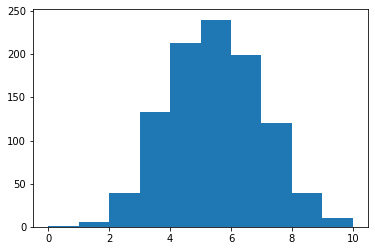

In [239]:
import matplotlib.pyplot as plt
np.random.seed(123)
final_tails = []
for x in range(1000):
    tails = [0]
    for x in range (10):
        coin = np.random.randint(0,2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])
plt.hist(final_tails, bins=10)

plt.show()

In [242]:
def raise_both(value1, value2):
    new_value1 = value1 ** value2
    new_value2 = value2 ** value1
    new_tuple = (new_value1, new_value2)
    return (new_tuple)
result = raise_both (2,3)
print(result)

(8, 9)


In [245]:
def mod2(x1,x2,x3):
    def inner(x):
        return x % 2 + 5
    return(inner(x1), inner(x2), inner(x3))
print(mod2(1,2,3))

(6, 5, 6)


In [246]:
def add_all(*args):
    sum_all =0
    for num in args:
        sum_all += num
    return sum_all 
add_all(1,2,3)

6

In [2]:
def print_all(*kwargs):
    for key,value in kwargs.items():
        print(key + ':'+value)

In [249]:
nums = [48,6,9,21]
square_all = map(lambda num: num**2, nums)

print(square_all)

print(list(square_all))

[2304, 36, 81, 441]


In [250]:
nums = [12,8,9,21]
new_nums = [num + 1 for num in nums] 
print(new_nums)

[13, 9, 10, 22]


In [258]:
pairs_1 = []

for num1 in range(0,2):
    for num2 in range(6,8):
        pairs_1.append(num2)
        
print(pairs_1)

[6, 7, 6, 7]


In [262]:
pairs_2 = [(num1, num2)for num1 in range (0,2) for num2 in range (6,8)]
print(pairs_2)

[(0, 6), (0, 7), (1, 6), (1, 7)]


In [ ]:
[num **2 if num %2 ==0 else 0 for num in range (10)]

In [263]:
even_nums = (num for num in range (10) if num %2 == 0)
print(list(even_nums))

[0, 2, 4, 6, 8]


In [266]:
def num_sequence(n):

    i =0
    while i < n:
        yield i
        i+=1
        
result = num_sequence(5)

for item in result:
    print(item)

0
1
2
3
4


In [ ]:
filename = 'mint.txt'
data = np.loadtxt(filename, delimiter= ',', skiprows=1, usecols=[0,2])
data


In [ ]:
df[df.population > 1000000]

In [ ]:
df.boxplot(column='population',by='continent' )

In [ ]:
tb_melt['sex'] = tb_melt.variable.str[0]

In [ ]:
w_data = w.pivot_table(values, index, columns,aggfunc=np.mean )

In [ ]:
#df['treatment']= df['treatment'].astype(str)
#df['treatment']= pd.to_numeric(df[treatment],errors='coerce') # errors with Nan

In [ ]:
df.apply(np.mean, axis=0)

In [ ]:
df2.loc[:, df2.all()] # select column with all nonzeros
df2.loc[:, df2.any()] # select column with any nonzeros

In [281]:
#sales = pd.Dataframe({'weekday': ['Sun','Sun','Mon','Mon'],
#'city': ['Austin','Dallas','Austin','Dallas'],
#'bread':[139, 237,326,456],
#'butter':[20,45,70,98]})
#sales

In [ ]:
sales.groupby('city')[['bread','butter']].agg(['max','sum'])

### 2.8. Working with Big Data

<p>If the dataset you want to load is too big to fit in the memory, you can deal with it by using a batch machine learning algorithm, which works with only a part of the data at once. This operation is also called data streaming since the dataset flows into a DataFrame or some other data structure as a continuous flow. As opposed to all the previous cases, the dataset has been fully loaded into the memory in a standalone step. </p>

In [ ]:
# imagine that movies dataset is a huge dataset that does not fit in your memmory
movies_chunks = pd.read_csv('./movielens/movies.csv', chunksize=10) 
for chunk in movies_chunks: 
    print ('Shape:', chunk.shape) 
    print (chunk,'n')

In [ ]:
#reading the First 1000 Rows
%%time
df1 = pd.read_csv("./movielens/movies.csv", nrows = 1000)

In [ ]:
df1.shape

In [ ]:
df1.info(memory_usage=True)

In [ ]:
df1.info(memory_usage='deep')

In [ ]:
df1.memory_usage(True)

In [ ]:
df1.memory_usage(deep= True)

In [ ]:
columns = ['movieid','title','genres','rating']

%%time
df1 = pd.read_csv("./movielens/movies.csv", usecols = columns)

In [ ]:
chunksize = 10 ** 3
df_movies_chunks = pd.Dataframe()
for chunk in pd.read_csv("./movielens/movies.csv", chunksize=chunksize)
    movies_chunks=chunk[chunk['rating']>10000]
    df_movies_chunks = pd.concat([df_movies_chunks, movies_chunks])

<p><b>Note:</b> The output of the read_csv function, in this case, is not a pandas DataFrame, but an iterator-like object. In fact, to get the results in memory, you need to iterate that object</p>